In [19]:
from model.baseline import *
from model.load import *

import time
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
def main(filename: str):
    '''
    filename: Model name idenfitier with hdf5 extension.
    '''
    #Optimize performance 
    tf.keras.backend.clear_session()
    os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

    #Load dataset
    DATASET = "extracted_audio"
    PATH = os.path.join(os.getcwd(), DATASET)
    
    x_train, y_train, x_test, y_test = loadSpectrogram(PATH)
    train, validation = loadDataset(x_train, y_train, x_test, y_test)
    
    model = network()
    
    #Callbacks 
    ckpt = os.path.join(os.getcwd(), 'model', 'ckpt', filename)
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau(), 
                 tf.keras.callbacks.ModelCheckpoint(filepath = ckpt, monitor = "val_accuracy", save_best_only = True,
                                                     mode = "max"),
                 tf.keras.callbacks.EarlyStopping()]
    
    start = time.time()
    history = model.fit(train, validation_data = validation, epochs = 10, callbacks = callbacks,
                        class_weight = {0:1., 1:1.})
    end = time.time()
    print(f"Model train time: {end - start}")
    
    predictions = model.predict_classes(x_test)
    val_accuracy = accuracy_score(predictions, np.argmax(y_test, 1))
    matrix = confusion_matrix(np.argmax(y_test, 1), predictions)
    
    TN = matrix[0][0] 
    TP = maxtrix[1][1]
    FN = matrix[0][1]
    FP = matrix[1][1]
    
    plotConfusionMatrix(matrix)
    
    return history 

In [34]:
if __name__ == "__main__":
    FILENAME = "baseline.hdf5"
    history = main(FILENAME)

Train for 438 steps, validate for 110 steps
Epoch 1/10
438/438 [==============================] - 330s 753ms/step - loss: 0.4286 - accuracy: 0.7997 - val_loss: 0.4166 - val_accuracy: 0.8151
Epoch 2/10
438/438 [==============================] - 331s 755ms/step - loss: 0.3618 - accuracy: 0.8321 - val_loss: 0.3634 - val_accuracy: 0.8377
Epoch 3/10
438/438 [==============================] - 317s 724ms/step - loss: 0.3391 - accuracy: 0.8443 - val_loss: 0.3393 - val_accuracy: 0.8434
Epoch 4/10
438/438 [==============================] - 296s 675ms/step - loss: 0.3227 - accuracy: 0.8517 - val_loss: 0.3258 - val_accuracy: 0.8466
Epoch 5/10
438/438 [==============================] - 290s 661ms/step - loss: 0.3062 - accuracy: 0.8585 - val_loss: 0.3264 - val_accuracy: 0.8386
Model train time: 1563.4148955345154


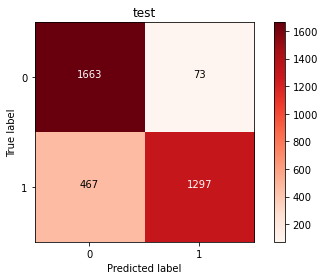

In [97]:
plotConfusionMatrix(cnf_matrix)